In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb
import pandas as pd

import matplotlib.pyplot as plt
from DynLaborFertModel import DynLaborFertModelClass

## Initialization
Models are initialized with the same parameters used in lectures for ease of comparison. Each model below only differ in values of $\beta_1$

In [3]:
model01 = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1':0.01})
par01 = model01.par
sol01 = model01.sol
sim01 = model01.sim

model02 = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1':0.02})
par02 = model02.par
sol02 = model02.sol
sim02 = model02.sim

model05 = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3}) #beta_1 = 0.05
par05 = model05.par
sol05 = model05.sol
sim05 = model05.sim

model07 = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1':0.07})
par07 = model07.par
sol07 = model07.sol
sim07 = model07.sim

model10 =DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1':0.1})
par10 = model10.par
sol10 = model10.sol
sim10 = model10.sim

## Problem 1

In [189]:
models = (model05, model01, model02, model05, model07, model10)
for m in models:
    m.solve()
    m.simulate()

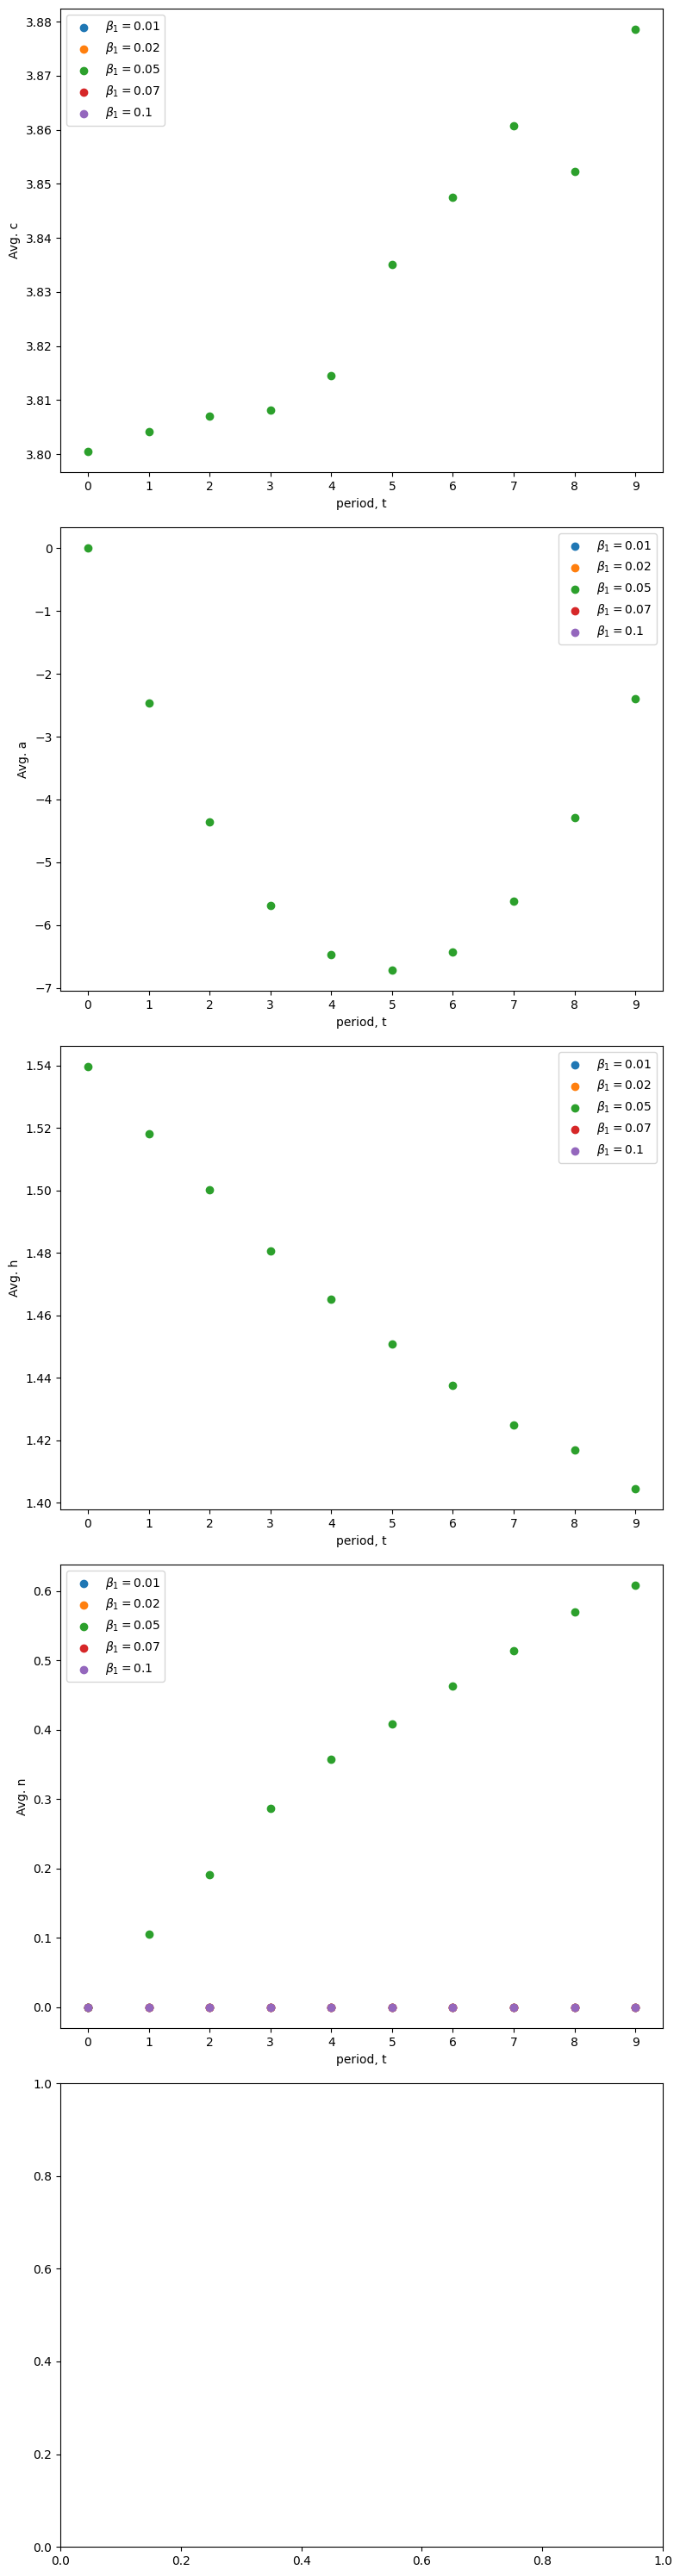

In [234]:
simulations = {
    r'$\beta_1=0.01$': sim01,
    r'$\beta_1=0.02$': sim02,
    r'$\beta_1=0.05$': sim,
    r'$\beta_1=0.07$': sim07,
    r'$\beta_1=0.1$': sim10,
}

fig, axes = plt.subplots(nrows=len(simulations), ncols=1, figsize=(8, 6 * len(simulations)))
for i, (var, ax) in enumerate(zip(('c', 'a', 'h', 'n'), axes)):
    ax.set(xlabel='period, t', ylabel=f'Avg. {var}', xticks=range(par.simT))
    for label, data in simulations.items():
        ax.scatter(range(par.simT), np.mean(getattr(data, var), axis=0), label=label)
    ax.legend(loc='best')
plt.tight_layout()

NameError: name 'simulations' is not defined

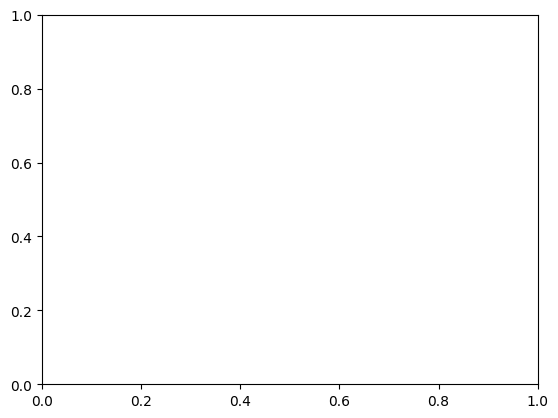

In [19]:
fig, ax = plt.subplots()
for label, data in simulations.items():
    birth = np.zeros(data.n.shape, dtype=np.int_)
    birth[:, 1:] = (data.n[:, 1:] - data.n[:, :-1]) > 0
    ax.scatter(range(par.simT), np.mean(birth, axis=0), label=label)
ax.set(xlabel='period, t', ylabel=f'birth freq.', xticks=range(par.simT))
ax.legend(loc='best')

In [22]:
birth = np.zeros(sim.n.shape, dtype=np.int_)
birth[:, 1:] = (sim.n[:, 1:] - sim.n[:, :-1]) > 0

In [23]:
periods = np.tile([t for t in range(par.simT)],(par.simN,1))
time_of_birth = np.max(periods * birth, axis=1)

I = time_of_birth>0
time_of_birth[~I] = -1000 # never as a child
time_of_birth = np.transpose(np.tile(time_of_birth , (par.simT,1)))

time_since_birth = periods - time_of_birth

In [194]:
min_time = -8
max_time = 8
event_grid = np.arange(min_time,max_time+1)

event_hours = np.nan + np.zeros(event_grid.size)
for t,time in enumerate(event_grid):
    event_hours[t] = np.mean(sim.h[time_since_birth==time])

# relative to period before birth
event_hours_rel = event_hours - event_hours[event_grid==-1]


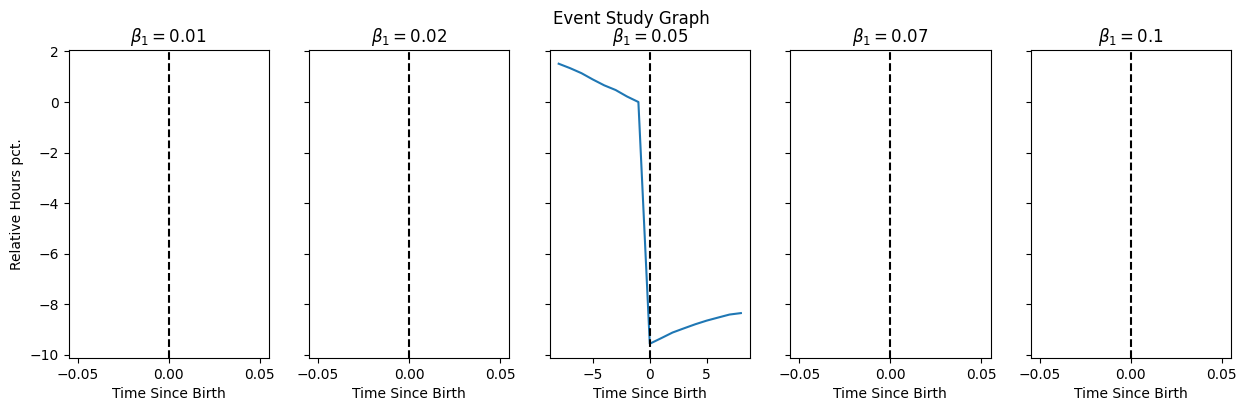

In [235]:
min_time = -8
max_time = 8
event_grid = np.arange(min_time, max_time + 1)

fig, axs = plt.subplots(1, len(simulations), figsize=(15, 4), sharey=True)
for i, (label, data) in enumerate(simulations.items()):
    for t, time in enumerate(event_grid):
        event_hours[t] = np.mean(data.h[time_since_birth == time])
    event_hours_rel = event_hours - event_hours[event_grid == -1]
    event_hours_pct = event_hours_rel / event_hours[event_grid == -1] * 100
    axs[i].plot(event_grid, event_hours_pct, label=label)
    axs[i].set_title(label)
    axs[i].set_xlabel('Time Since Birth')
    axs[i].axvline(x=0, color='k', ls='--')
axs[0].set_ylabel('Relative Hours pct.')
plt.suptitle('Event Study Graph')
plt.show()


# Problem 2

In [4]:
model_tau101 = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3,'tau':0.101}) 
sim = model_tau101.sim
sol = model_tau101.sol
par = model_tau101.par

In [5]:
model_tau101.solve()
model_tau101.simulate()
model05.solve()
model05.simulate()

In [16]:
income = sim05.c+sim05.a
hours_worked = sim05.h
income_taxed = sim.c+sim.a
hours_worked_taxed = sim.h
LS_change = (np.log(hours_worked_taxed)-np.log(hours_worked))*100
income_change = (np.log(income_taxed)-np.log(income))*100
me = LS_change/income_change

C:\Users\simha\AppData\Local\Temp\ipykernel_5580\2711668757.py:6: RuntimeWarning: invalid value encountered in log
  income_change = (np.log(income_taxed)-np.log(income))*100


In [26]:
min_time = -8
max_time = 8
event_grid = np.arange(min_time, max_time + 1)
event_hours = np.nan + np.zeros(event_grid.size)
for t,time in enumerate(event_grid):
    event_hours[t] = np.mean(me[time_since_birth==time])

In [13]:
dfsimtax = pd.DataFrame({'c':np.mean(sim.c, axis =0),'h':np.mean(sim.h, axis =0),'a':np.mean(sim.a),'k':np.mean(sim.k, axis =0),'n':np.mean(sim.n, axis =0)})

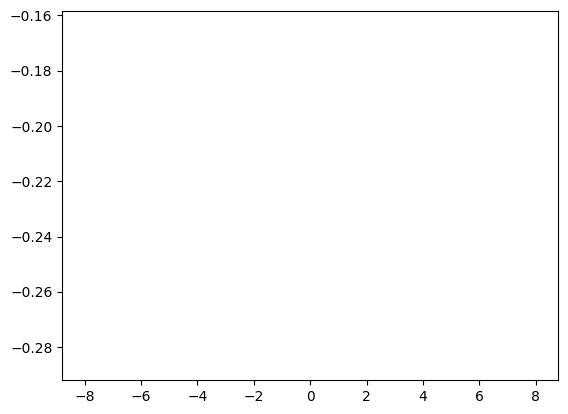

In [29]:
fig, ax = plt.subplots()
ax.plot(event_grid,event_hours)

In [ ]:

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)

# Calculate Marshall elasticity for each simulation and age
for label, data in simulations.items():
    # Simulate under initial tax regime
    data.set_parameters(tau_c=par.tau_c)
    data.solve()
    L0 = np.mean(data.n, axis=0)
    w0 = data.w
    # Simulate under new tax regime
    data.set_parameters(tau_c=par.tau_c + 0.01)
    data.solve()
    L1 = np.mean(data.n, axis=0)
    w1 = data.w
    # Calculate Marshall elasticity for each age
    dL = (L1 - L0) / L0 * 100
    dw = 1
    Marshall_elasticity = dL / dw
    # Plot Marshall elasticity against age
    axs[0].plot(np.arange(par.T), Marshall_elasticity, label=label)

axs[0].set_ylabel('Marshall elasticity')
axs[0].legend(loc='best')

# Plot birth rate against age
for label, data in simulations.items():
    birth = np.zeros(data.n.shape, dtype=np.int_)
    birth[:, 1:] = (data.n[:, 1:] - data.n[:, :-1]) > 0
    birth_rate = np.mean(birth, axis=0)
    axs[1].plot(np.arange(par.T), birth_rate, label=label)

axs[1].set_xlabel
